In [30]:
import pandas as pd
import cv2
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import copy as cp
import numpy as np
import math
import keras
import tensorflow
import pprint
from sklearn.model_selection import train_test_split
from keras import layers




import os
import cv2
import math
import numpy as np



import matplotlib.pyplot as plt
from IPython.display import clear_output

from tensorflow.python import keras
from keras import layers
from keras.models import Model, Sequential
from keras.optimizers import Adam

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelBinarizer


import numpy as np
import pandas as pd
import os
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
labels_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,
                   'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,
                   'Z':25,'space':26,'del':27,'nothing':28}


count_dict ={'A':920,'B':920,'C':920,'D':920,'E':920,'F':920,'G':920,'H':920,'I':920,'J':920,'K':910,'L':920,'M':920,
                   'N':920,'O':914,'P':920,'Q':920,'R':920,'S':920,'T':920,'U':920,'V':920,'W':920,'X':920,'Y':920,
                   'Z':920,'space':920,'del':920,'nothing':920}


images = []
labels = []
size = 64,64

#     X = []
#     y = []
#     for path in tqdm(sorted(os.listdir(dir))):
#         for file in os.listdir(dir + path):
#             if not file.startswith('.'):
#                 img = cv2.imread(dir + path + '/' + file, 0)
#                 img = ~img
#                 img = cv2.GaussianBlur(img, (3, 3), 0)
#                 img = cv2.resize(
#                     img,
#                     dsize=(img_size, img_size),
#                     interpolation=cv2.INTER_CUBIC
#                 )
#                 X.append(img)
#                 y.append(alphabet[path])

#     X = np.array(X)
#     X = X.astype('float32')/255.0
#     y = np.array(y)
#     print('\n{} images loaded.'.format(len(X)))

In [40]:
for i in count_dict:
    print (str(i)+str(count_dict[i]))
    for j in range(0,count_dict[i]):
        img = cv2.imread('train\\'+i+'\\'+str(j)+'.jpg')
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        temp_img = cv2.resize(gray, size)
#         images = np.array(temp_img)
#         temp_img = temp_img.astype('float32')/255.0
        images.append(temp_img)
        labels.append(labels_dict[i])
        


A920
B920
C920
D920
E920
F920
G920
H920
I920
J920
K910
L920
M920
N920
O914
P920
Q920
R920
S920
T920
U920
V920
W920
X920
Y920
Z920
space920
del920
nothing920


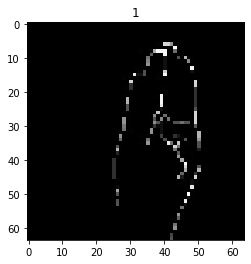

In [41]:
imagebackup=images

plt.title(labels[925])
plt.imshow(images[925],cmap='gray')

In [42]:

images=np.asarray(images)
images = images.astype('float32')/255.0


In [187]:
# pprint.pprint(images)

In [188]:
# pprint.pprint(imageslist)

In [43]:
templabels = labels
# labels = keras.utils.to_categorical(labels)

X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.05)

X_train = X_train.reshape(X_train.shape + (1,))
X_test = X_test.reshape(X_test.shape + (1,))

label_binarizer = LabelBinarizer()
y_train_encoded = label_binarizer.fit_transform(Y_train)
y_test_encoded = label_binarizer.fit_transform(Y_test)

In [45]:
img_input = layers.Input(shape=(64,64, 1))

x = layers.Conv2D(64, 3, activation='relu')(img_input)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv2D(64, 2, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)

output = layers.Dense(29, activation='softmax')(x)

model = Model(img_input, output)
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 62, 62, 64)        640       
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 60, 60, 32)        18464     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 26, 26, 128)       73856     
__________

In [46]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(1e-04),
    metrics=['acc']
)

In [ ]:
EPOCHS = 20
BATCH_SIZE = 64

history = model.fit(
    x=X_train, 
    y=y_train_encoded,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_test, y_test_encoded)
)

W0709 15:13:52.017056  6040 deprecation.py:323] From d:\ve\test-env\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50661 samples, validate on 2667 samples
Epoch 1/20
50661/50661 [==============================] - 1533s 30ms/step - loss: 2.7136 - acc: 0.2558 - val_loss: 1.9149 - val_acc: 0.5722
Epoch 2/20
50661/50661 [==============================] - 1489s 29ms/step - loss: 1.8018 - acc: 0.4728 - val_loss: 0.9264 - val_acc: 0.7889
Epoch 3/20
50661/50661 [==============================] - 1482s 29ms/step - loss: 1.2259 - acc: 0.6168 - val_loss: 0.4804 - val_acc: 0.8826
Epoch 4/20
50661/50661 [==============================] - 1481s 29ms/step - loss: 0.8846 - acc: 0.7126 - val_loss: 0.2739 - val_acc: 0.9321
Epoch 5/20
50661/50661 [==============================] - 1478s 29ms/step - loss: 0.6798 - acc: 0.7750 - val_loss: 0.1801 - val_acc: 0.9501
Epoch 6/20
27072/50661 [===============>..............] - ETA: 11:20 - loss: 0.5630 - acc: 0.8121